# Explorando o Dataset Boston Housing

Este dataset já vem no sci-kit learn e serve para experimentarmos a aplicação dos métodos e processos do aprendizado de máquina. Assim, podemos apenas importar o dataset, sem ter que baixare  carregar um `csv` ou alguma outra base de dados.

O dataset pode ser encontrado aqui: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import scipy.stats as stats # módulo para estatísticas
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# Carregando o dataset do sci-kit learn
from sklearn.datasets import load_boston
boston = load_boston() # instanciando o objeto 

Uma vez carregado o dataset, precisamos conhecê-lo para poder trabalhar com os dados por ele aprensedos. A seguir, vamos executar uma série de métodos para tal. 

In [3]:
# Verificando o tipo da variável resultante da instanciação do objeto load_boston
type(boston)

sklearn.utils.Bunch

In [8]:
# Visualizando o formato que vem os dados 
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [11]:
# Acessando `data`, que é onde está o que interessa para a predição
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [12]:
# `boston.data` é uma matriz do numpy:
print(type(boston.data))

<class 'numpy.ndarray'>


In [5]:
# Visualizando as dimensões: 506 linhas e 13 colunas
boston.data.shape

(506, 13)

In [6]:
# Visualizando a descrição da tabela
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Na descrição resultante do atributo `DESCR` da tabela `boston`, temos algumas informações relevantes. Primeiramente, temos um nome `Boston house prices dataset`, o que nos permite saber que o que estaos buscando aqui é o preço das casas em Boston. Depois, temos um resumo das mesmas características encontradas quando usamos o `shape` aplicado ao dataset `boston`, nos mostrando as dimensões do mesmo: 506 linhas e 13 colunas. Ainda no que se refere às características, há a informação de que 13 são a quantidade de informações (colunas) preditivas, ou seja, dados que serão usados para poder prever o preço das casas. O que seria a 14º coluna é o target (alvo) da nossa predição, que é justamente o preço das casas, obtido através de um relacionamento que deve haver entre os demais atributos. 

Depois da lista de cada um dos atributos, há informações sobre o tratamento dos valores missing, que são representados como nulos, e informações sobre quem obteve esses dados, quando, onde  e para que eles são usados.

In [7]:
# Podemos ver quais são os atributos preditivos usando:
print(boston.feature_names)

# Aqui não vemos o atributo MEDV, que é o preço das casas, que serão obtidos com a predição

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
# Transformando o dataset em um DataFrame pandas para fazer as manipulações
df_boston = pd.DataFrame(boston.data)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# Alterando os nomes das colunas para que sejam iguais ao feature_names
df_boston.columns = boston.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# Verificando a coluna de preços
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
# Criando uma nova coluna para o `df_boston` contendo a lista de preços]
df_boston['PRICE'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Prevendo os preços das casas em Boston

Até o momento o que foi feito foi um processo de exploração dos dados. Apenas conhecemos os dados e manipulamos eles de forma que seja possível trabalhar no processo de predição. Vimos seu tipo, dimensões, atributos, convertemos em um Dataframe pandas e adicionamos uma nova coluna para poder chegar ao objetivo final. 

A partir de agora vamos aplicar os métodos do sci-kit learn para entregar essa predição. 

Essa predição será realizada com a técnica de regressão linear. Sendo assim, teremos, como dito anteriormente, dois tipos de variáveis: 

- y: variável dependente, representa o preço das casas;
- x: variáveis independentes ou explanatórias, representam todas as demais colunas do dataset e influenciam o preço das casas. 

In [18]:
# Importando método de regressão linear
from sklearn.linear_model import LinearRegression

In [19]:
# Definindo quais dados serão parte das variáveis preditoras
# Nesse caso, não será usada a coluna `PRICE`, já que ela não é uma variável preditora e, sim, a dependente
# que queremos encontrar a partir da predição
x = df_boston.drop('PRICE', axis=1)

In [20]:
# Definindo o valor da variável dependente y
y = df_boston.PRICE

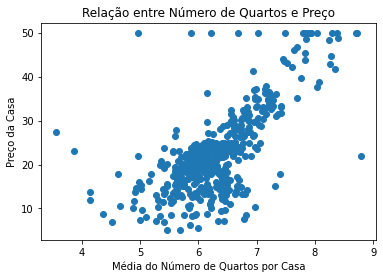

In [21]:
# Criando uma visualização da relação entre quantidade de quartos e preço da casa
plt.scatter(df_boston.RM, y)
plt.xlabel('Média do Número de Quartos por Casa')
plt.ylabel('Preço da Casa')
plt.title('Relação entre Número de Quartos e Preço')
plt.show()

In [22]:
# Criando modelo a partir da instância de LinearRegression
model = LinearRegression()

In [23]:
# Treinando o modelo
model.fit(x, y)

LinearRegression()

In [24]:
# Visualizando os coreficientes 
print('Coeficiente: ', model.intercept_) # intercepto: representa o b0 da equação lienar
# referência: https://medium.com/@lamartine_sl/regress%C3%A3o-linear-com-sklearn-modelo-de-previs%C3%A3o-de-custos-com-plano-de-sa%C3%BAde-5e963e590f4c
print('Quantidade: ', len(model.coef_)) # modelo de regressão lienar multipla, dada qtd de coeficientes

Coeficiente:  36.459488385089806
Quantidade:  13


In [26]:
# Prevendo os preços das casas
model.predict(x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

A forma de fazer a predição utilizando o método `predict` está incorreta, uma vez que estamos usando para fazê-la o memso conjunto de dados utilizado para treinar o modelo. Sendo assim, o que temos que fazer, na verdade, é utilizar um conjunto de dados **apenas** para **treino** e outro conjunto **apenas** para **teste**.

Podemos fazer um gráfico que relacione os preços originais com os preços obtidos pelo modelo e perceber que existem alguns erros na predição.


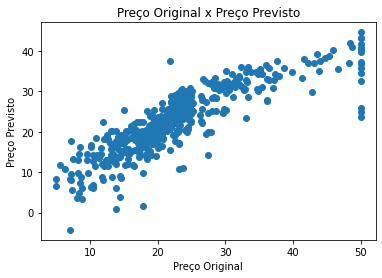

In [28]:
# Comparação entre perços originais e previstos
plt.scatter(df_boston.PRICE, model.predict(x))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original x Preço Previsto')
plt.show()

É possível calcular a taxa média de erro obtido pelo modelo a partir da média da subtração entre os valores otiginais e obtidos da predição. 


In [31]:
# Calculando Mean Square Error (MSE)
# referência: https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/
mse = np.mean((df_boston.PRICE - model.predict(x)) ** 2)
print(mse)

21.894831181729224


In [36]:
# Calculando a taxa de erro para apenas uma variável preditora
one_variable_model = LinearRegression()
one_variable_model.fit(x[['PTRATIO']], df_boston.PRICE)
new_mse = np.mean((df_boston.PRICE - one_variable_model.predict(x[['PTRATIO']])) ** 2)
print(new_mse)

62.65220001376927


Usando apenas uma variável para prever o preço da casa, vimos que a taxa média de erro aumentou. Isso significa aue uma variável **não é suficiente par prever o preço**. Assim, a divisão mensionada anteriormente em dataset de **treino** e dataset de **teste** é o que pode nos ajudar a ter uma previsão mais correta. 

Para isso podemos fazer a divisão de duas formas diferentes:

1. Manual: Fazer o slicing do dataset - menos indicado;
2. Randômica: Usar método do `sklearn` - mais indicado

In [37]:
# Separando os dados de forma manual
# Variáveis preditivas
x_treino = x[:-50]
x_teste = x[-50:]

# Variável dependente
y_treino = df_boston.PRICE[:-50]
y_teste = df_boston.PRICE[-50:]

# Imprimindo shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


In [38]:
# Separando os dados de forma aleatória
# importando o método `train_test_split` do `sklearn`, responsável pela separação
from sklearn.model_selection import train_test_split

In [39]:
# Separando dados de treino e teste
# `test_size` define que 30% dos dados serão usados para teste, ou seja, 70% dos dados serão para treino
# `random_state` define que será tudo randomizado
x_treino, x_teste, y_treino, y_teste = train_test_split(x, df_boston.PRICE, test_size=0.30, random_state=5)

In [40]:
# Imprimindo shape dos datasets
print(x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [41]:
# Criando o modelo novamente
new_model = LinearRegression()

In [42]:
# Treinando o modelo com os dados de treino obtidos aleatoriamente acima
new_model.fit(x_treino, y_treino)

LinearRegression()

In [45]:
# Criando as previsões
pred_treino = new_model.predict(x_treino)
pred_teste = new_model.predict(x_teste) # no mundo real usaríamos os dados de teste. aqui podemos comparar os dois

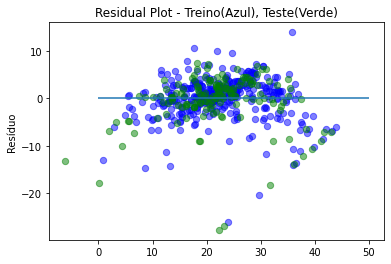

In [46]:
# Comparando os preços originais e previstos de forma gráfica
plt.scatter(new_model.predict(x_treino), new_model.predict(x_treino) - y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(new_model.predict(x_teste), new_model.predict(x_teste) - y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()